## Parte III – Validação Holdout em Problema Não-Linearmente Separável
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 05/09/2020

Esta tarefa consistiu em aplicar o percetron de Rosenblatt em uma tarefa Não-linearmente Separável, O primeiro passo foi implementar o percetron em Forma de classe para que a sua ultização posterior tivesse mais clareza e também para usar na parte 2 do projeto. Em seguida plotou-se o conjunto de dados para se comprovar que se tratava de um problema não-linear.

## Importando as bibliotecas usadas na tarefa

In [14]:
import random
import itertools
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor

## Lendo os dados do arquivo dataHoldout.txt

Ao realizar a leitura, percebeu-se que todos os exemplos das entradas estavam na dimensão (1, n) e por isso foi realizado um reshape no conjunto de dados. Tornando os dados na dimensão (n, 3) onde cada exemplo é composto por x1, x2 e y, onde o y é sempre 0 ou 1.

In [15]:
dataset = np.fromfile('../dados/dataHoldout.txt')
number_instances = dataset.shape[0] // 3 ## 3 é quantidade de colunas
dataset = dataset.reshape(number_instances, 3)
dataset

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

## Plotando o conjunto de dados

Imprimindo o cojunto de dados para identificar como os dados estão distribuidos, com a impressão fica evidente que os dados não estão dispostos de maneira que seja possível separar linearmente.

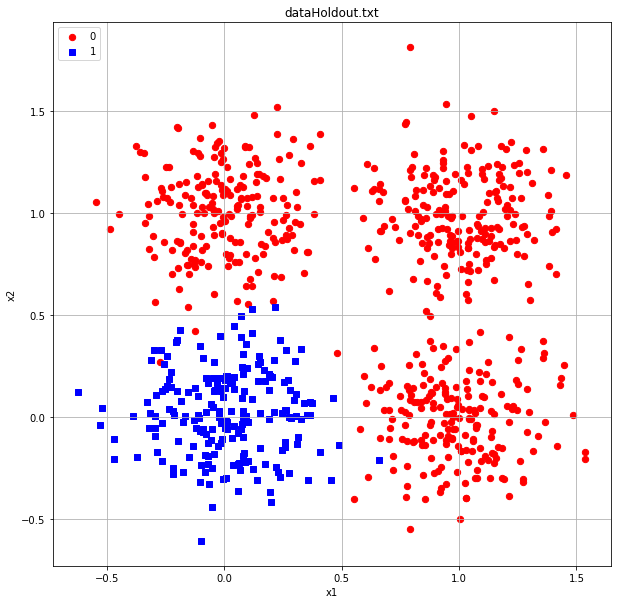

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(dataset[:,0][dataset[:, 2] == 0.0], dataset[:,1][dataset[:, 2] == 0.0], c='r', s=40, marker='o', label='0')
plt.scatter(dataset[:,0][dataset[:, 2] == 1.0], dataset[:,1][dataset[:, 2] == 1.0], c='b', s=40, marker='s', label='1')
plt.title('dataHoldout.txt')
plt.legend(loc='upper left')
plt.ylabel('x2')
plt.xlabel('x1')
plt.grid(True)
plt.show()

In [17]:
#TODO: criar uma função que deliminea a os grupos

## Separando os dados em partições de treino e teste

A função **train_test_split()** recebe um *dataset* e um número entre 0.0 a 1.0 que representa a porcentagem reservada para o conjunto de treino. Ela retorna 4 conjuntos, **x_train**, **y_train**, **x_test**, **y_test**. Em seguida esses conjuntos de treino e teste são plotados para visualizar como eles estão dispostos

number_instances_train=560
number_instances_test=240


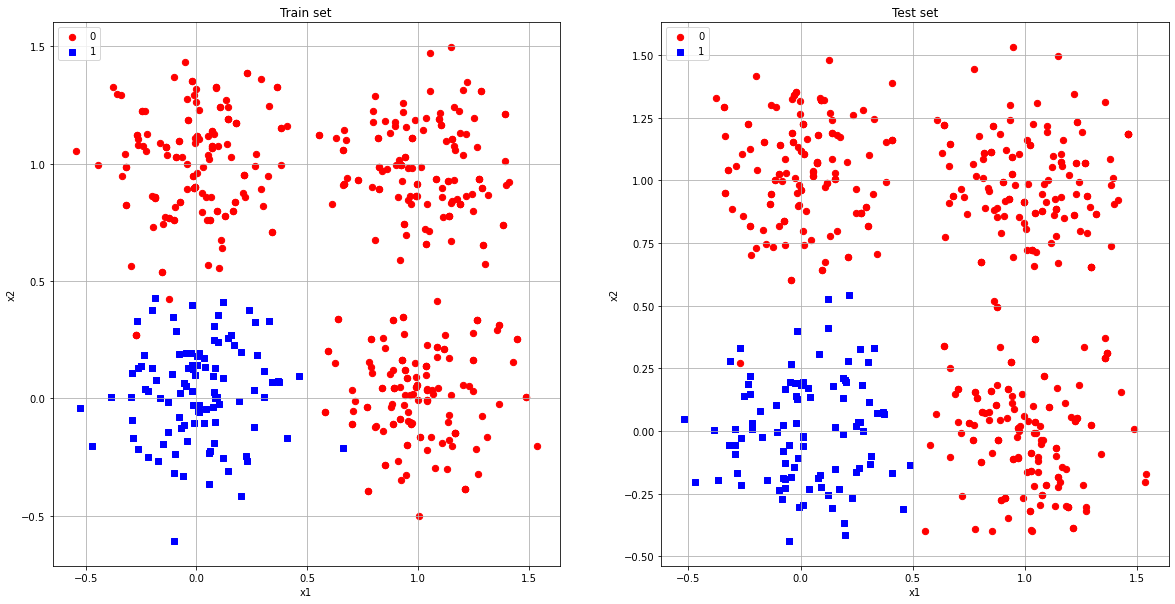

In [18]:
plt.figure(figsize=(20, 10))
def plot_set1(d, title, number_graph):
    plt.subplot(1, 2, number_graph)
    plt.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40, label='0')
    plt.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40, label='1')
    plt.grid(True)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.ylabel('x2')
    plt.xlabel('x1')

def train_test_split(dataset, percent_train=0.7):
    number_instances_train = ceil(len(dataset)*percent_train)
    number_instances_test = len(dataset) - number_instances_train
    print(f'number_instances_train={number_instances_train}')
    print(f'number_instances_test={number_instances_test}')
    index = np.random.randint(low=0, high=len(dataset), size=number_instances_train)
    plot_set1(dataset[index], 'Train set', 1)
    plot_set1(dataset[~index], 'Test set', 2)
    x_train = dataset[index][:,[0,1]]
    y_train = dataset[index][:, 2]
    x_test = dataset[~index][:, [0,1]]
    y_test = dataset[~index][:, 2]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(dataset, percent_train=0.7)

## Importando o perceptron de Rosenblatt

*** Esta classe foi implemanta por mim e está no arquivo '../src/Perceptron.py'

In [19]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Treinando um percetron com o conjuntos de treinamento

Para o treinamento foram usados os conjuntos **x_train** e **y_train** com 560 instâncias.

In [20]:
perceptron = Perceptron(no_of_inputs=2, 
                            random_train_set=True,  
                            epoch=100, 
                            use_epoch=True)
perceptron.fit(x_train, y_train)


Quantidade total de épocas: 100
Quantidade total de ajustes: 3253
Vetor final de pesos: [-0.4578 -1.15   -1.0052]


(100, 3253)

## Fazendo a predição do conjunto de teste

Para a predição foi usado o conjunto **x_test** que não continham a coluna target, a predição dos dados é feita com os pesos encontrados no treinamento.

In [21]:
y_pred = perceptron.predict(x_test)
y_pred

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

## Gerando a matriz de confusão com os resultados preditos do conjunto de teste

Para gerar a matriz de confusão foram usados o conjunto de **y_test** e **y_pred**.

In [22]:
results = np.array([y_test, y_pred])
true_positive = len(results[0][(results[0] == 1.0) & (results[1] == 1.0)])
true_negative = len(results[0][(results[0] == 0.0) & (results[1] == 0.0)])
false_positive = len(results[0][(results[0] == 0.0) & (results[1] == 1.0)])
false_negative = len(results[0][(results[0] == 1.0) & (results[1] == 0.0)])
confusion_matrix = np.array([[true_positive, false_positive], [false_negative,  true_negative]])
print(confusion_matrix)

[[113   3]
 [ 16 428]]


## Plotando a matriz de confusão

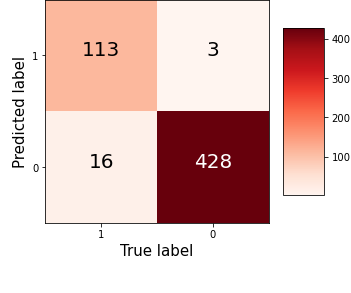

In [23]:
def plot_confusion_matrix(cm, classes=['1', '0'], normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):

    # Plot the confusion matrix
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, size = 10)
    plt.yticks(tick_marks, classes, size = 10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center",
                                                color="white" if cm[i, j] > thresh else "black")
        
    #plt.grid(None)
    #plt.tight_layout()
    plt.ylabel('Predicted label', size = 15)
    plt.xlabel('True label', size = 15)

plot_confusion_matrix(cm = confusion_matrix,title='Confusion matrix')

## Metricas de Desempenho

### Acurácia

A acurácia é mede a porcentagem de acerto do modelo no conjunto de teste, para o perceptron aqui com o conjunto de dados de teste a acurácia é elevada o que indica que ele acertou bastante a classificação dos dados do conjunto de teste.

In [24]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
accuracy

0.9660714285714286

### Precisão 

A precisão por sua vez, mede a porcentagem das amostras positivas corretamente em relação a todas as instâncias classificadas como positivas. No teste aqui a precisão é elevada o que indica que o perceptron conseguiu aprender bem os as instâncias positivas.

In [25]:
precision = true_positive/(true_positive + false_positive)
precision

0.9741379310344828

### Revocação

A revocação vai dizer a frequência em que o classificador encontra os exemplos de uma classe, ou seja, quando realmente é da classe X. Aqui também tem um valor maior que 80% o que indica um bom desempenho do classificador.

In [26]:
recall = true_positive/(true_positive + false_negative)
recall

0.875968992248062

### F-Score

Essa métrica combina precisão e recall para trazer um número único que indique a qualidade geral do modelo e trabalha bem até com conjuntos de dados que possuem classes desbalanceadas. Aqui também é maior que 80%. 

In [27]:
f_score = 2 * (precision * recall) / (precision + recall)
f_score

0.9224489795918366

## Plotando a reta da solução para o conjuto de treino e de testes

Com a reta da solução é possível idendificar que o perceptron consegue aprender bem as características, uma das coisas que se percebe é que quanto mais exemplos de uma classe é mostrado mais o perceptron aprende mais dela e como o problema é não-linearmente separável a reta plotada não separa as duas classes totalmente, mas o perceptron consegue fazer o melhor possível e separa com uma perfomasse boa de acordo com as métricas.

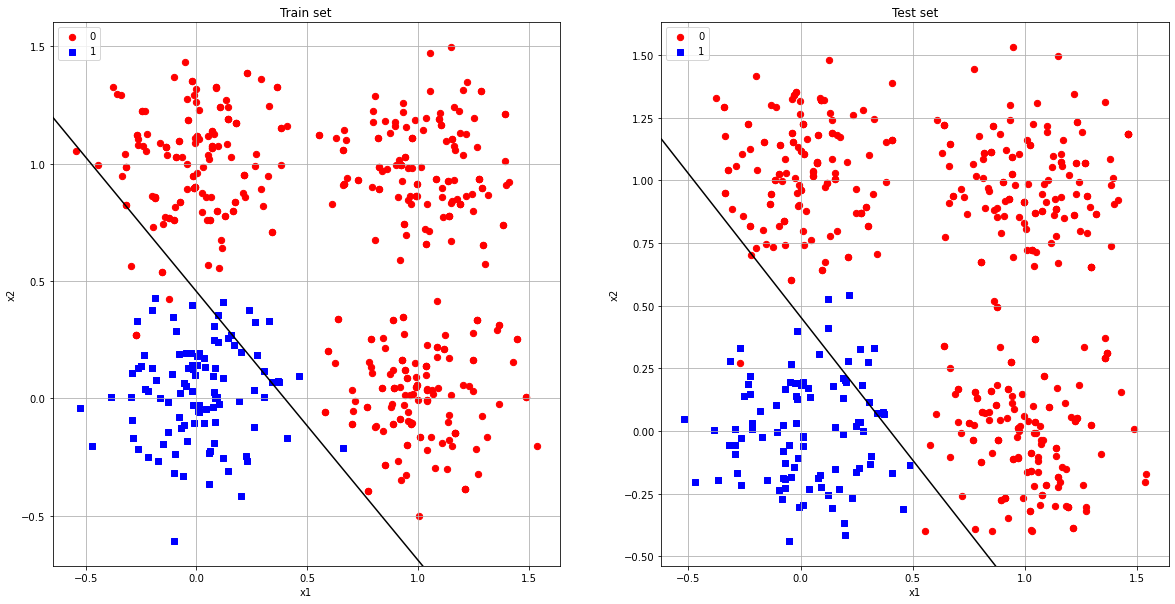

In [28]:
plt.figure(figsize=(20, 10))
def plot_set2(inputs, targets, weights, number_graph, title=''):
    d = []
    for i,o in zip(inputs,targets):
        d.append(np.append(i, o))
    d = np.array(d)
    
    plt.subplot(1, 2, number_graph)
    plt.grid(True)
    plt.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40, label='0')
    plt.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40, label='1')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.ylabel('x2')
    plt.xlabel('x1')

    # plotando a reta da solução
    # plot([0, weights[0]/weights[2]], [weights[0]/weights[1], 0]) #-> plot entre pontos
    slope = -(weights[0]/weights[2]) / (weights[0]/weights[1]) #-> inclinação da reta
    plt.axline((0, weights[0]/weights[2]), slope=slope, color="black") #-> plot para reta infinita
 
plot_set2(x_train, y_train , perceptron.weights, 1, 'Train set')
plot_set2(x_test, y_test , perceptron.weights, 2, 'Test set')